<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/7_QUAMTUM_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
!pip install -U qiskit-aer pylatexenc matplotlib qiskit[visualization] > /dev/null
!pip install pennylane --quiet

In [90]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from qiskit import transpile

#¿Por que MACHINE LEARNING CUANTICO (QML)?


---

En la práctica, los computadores cuánticos actuales admiten solo unas pocas decenas de cúbits, y las proyecciones indican que, en el corto plazo, este número no superará los 1000. Además, la preparación de estados cuánticos, las compuertas cuánticas y las mediciones cuánticas en computadores cuánticos reales están sujetas a decoherencia y ruido. Esto hace necesario implementar formas de corrección de errores cuánticos para emular la operación sin ruido que suponen los algoritmos cuánticos diseñados formalmente. A su vez, esto incrementa aún más el número de cúbits físicos necesarios para garantizar el nivel deseado de confiabilidad

1. Selección del PQC (circuito cuántico paramétrico):Esta es una secuencia de compuertas cuánticas con parámetros ajustables $\theta$, análogo a elegir una arquitectura de red neuronal en el aprendizaje clásico.

2. Optimización paramétrica: Un optimizador clásico ajusta los parámetros $\theta$ para minimizar una función de costo, utilizando mediciones del circuito cuántico.

lo cual permite adaptar los algoritmos a las limitaciones reales del hardware cuántico,  puede descubrir algoritmos eficaces que serían difíciles de diseñar manualmente.

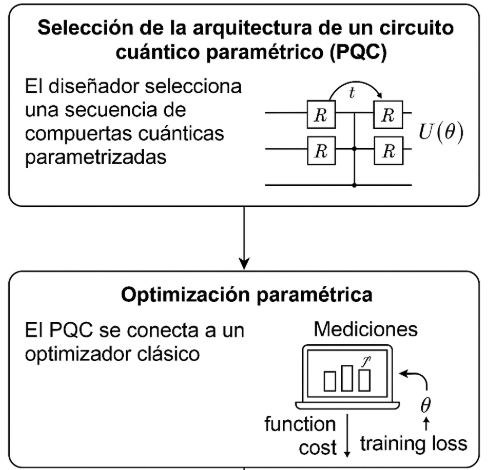


A diferencia del aprendizaje automático clásico, en el cual tanto los datos como el procesamiento son clásicos, en el aprendizaje automático cuántico los datos y/o el procesamiento son cuánticos.


| Tipo de datos | Procesamiento | Código |
| ------------- | ------------- | ------ |
| Clásicos      | Clásico       | CC     |
| Clásicos      | Cuántico      | CQ     |
| Cuánticos     | Clásico       | QC     |
| Cuánticos     | Cuántico      | QQ     |


1. **CC (datos y procesamiento clásicos):** El machine learning tradicional, donde se optimiza un modelo como una red neuronal mediante un optimizador clásico.

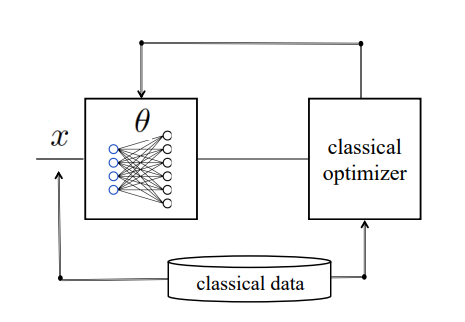

2. **CQ (datos clásicos y procesamiento cuántico):** Es el caso más común en la actualidad. Un circuito cuántico paramétrico (PQC) procesa datos clásicos mediante una unidad unitaria $U(x, \theta)$, donde $x$ es la entrada y $\theta$ son los parámetros a optimizar.

$$
|\psi(x,\theta)\rangle = U(x,\theta)|0\rangle
$$

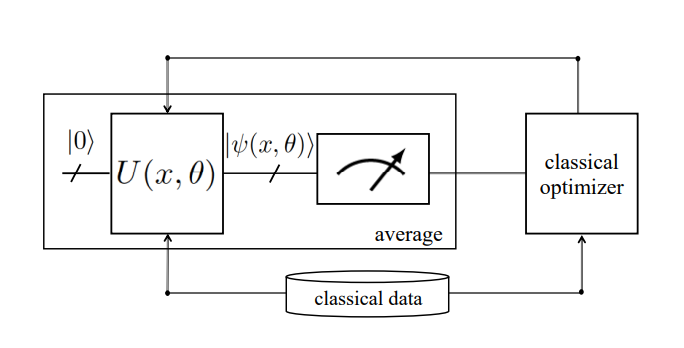


3. El caso **QQ** en aprendizaje automático cuántico involucra tanto datos como procesamiento cuánticos. Aquí, un **PQC** procesa los datos cuánticos y la **función de costo** se evalúa directamente en el computador cuántico, comparando la salida con datos cuánticos objetivo mediante circuitos adecuados.

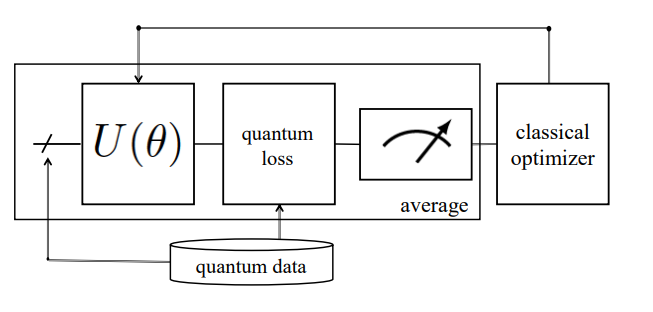


#Anzats y circuitos cuanticos parametrizados

Un circuito cuántico parametrizado (PQC) es una secuencia de compuertas cuánticas que dependen de un conjunto de parámetros clásicos ajustables
$\theta$. Estos circuitos implementan una transformación unitaria U(θ), y son el núcleo del aprendizaje automático cuántico.

La arquitectura del PQC se conoce como ansatz, término que proviene del alemán y significa "enfoque". Elegir un buen ansatz es tan importante como escoger una buena arquitectura en redes neuronales, y debe basarse en el conocimiento del problema cuando sea posible.


## Compuertas de un solo qubit parametrizadas

Las **compuertas Pauli de rotación** $R_P(\theta)$, donde $P \in \{X, Y, Z\}$, son compuertas cuánticas unitarias que rotan el vector de estado dentro de la esfere de bloch segun un angulo de entrada . Se definen como:

$$
R_P(\theta) = e^{-i \frac{\theta}{2} P} = \cos\left(\frac{\theta}{2}\right)I - i\sin\left(\frac{\theta}{2}\right)P
$$

Estas compuertas rotan el estado cuántico alrededor del eje $P$ del bloque de Bloch en un ángulo $\theta$.  como por ejemplo $R_X(-\pi) = iX$, $R_Y(-\pi) = iY$, $R_Z(-\pi) = iZ$

Es decir, para ciertos ángulos, estas compuertas recuperan  las compuertas Pauli estándar (como vimos anteriormente).Una compuerta de un solo qubit más general se puede construir como una secuencia de tres rotaciones Pauli:

$$
R(\theta_1, \theta_2, \theta_3) = R_P(\theta_1) R_{P'}(\theta_2) R_P(\theta_3)
$$

con $P \ne P'$, típicamente $P = Z$, $P' = Y$. Esta forma permite representar cualquier compuerta de un solo qubit (hasta una fase global).

Estas compuertas se pueden aplicar **en paralelo** a varios qubits. Por ejemplo, $R_k(\theta_1^{(k)}, \theta_2^{(k)}, \theta_3^{(k)})$ indica la aplicación de la compuerta al qubit $k$, mientras el resto permanece con identidad.

El **ansatz de campo medio** consiste en aplicar una compuerta general a cada qubit inicializado en $|0\rangle$, de forma paralela.se define como:


$$
U(\boldsymbol{\theta}) = R(\theta^1_0, \theta^2_0, \theta^3_0) \otimes \cdots \otimes R(\theta^1_{n-1}, \theta^2_{n-1}, \theta^3_{n-1}) = \prod_{k=0}^{n-1} R_k(\theta^1_k, \theta^2_k, \theta^3_k) \tag{6.9}
$$

donde los parámetros $(\theta^1_k, \theta^2_k, \theta^3_k)$ para $k \in \{0, 1, \ldots, n - 1\}$ son escalares. En conjunto, el vector de parámetros es:

$$
\boldsymbol{\theta} = [\theta^1_0, \theta^2_0, \theta^3_0, \ldots, \theta^1_{n-1}, \theta^2_{n-1}, \theta^3_{n-1}]^T
$$

y contiene $D = 3n$ parámetros.

Dado el estado de entrada $|0\rangle$, un circuito cuántico parametrizado (PQC) que siga el ansatz de campo medio genera el siguiente estado separable:

$$
U(\boldsymbol{\theta})|0\rangle = R(\theta^1_0, \theta^2_0, \theta^3_0)|0\rangle \otimes \cdots \otimes R(\theta^1_{n-1}, \theta^2_{n-1}, \theta^3_{n-1})|0\rangle \tag{6.10}
$$

Un PQC que use este ansatz puede generar todos los vectores de la base computacional. Esto se logra configurando por ejemplo * $\theta^1_k = 0$, $\theta^3_k = 0$, y $\theta^2_k = 0$ o $\pi$,

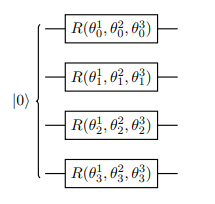

El **ansatz usado para la eficiencia  de hardware** combina compuertas de un solo qubit parametrizadas y una compuerta entrelazante fija (como CNOT o CZ), que no depende de los parámetros y se elige por su facilidad de implementación.
en particular, como se ilustra en la Figura, el ansatz  prescribe circuitos cuánticos parametrizados  que implementan una cascada de $L$ capas de operadores unitarios de la forma:

$$
U(\theta) = U_L(\theta) \cdot U_{L-1}(\theta) \cdots U_1(\theta)
$$

donde cada matriz unitaria $U_l(\boldsymbol{\theta})$ en la capa $l$-ésima se puede expresar como:

$$
U_l(\theta) = U_{\text{ent}} \left( R(\theta^1_{l,0}, \theta^2_{l,0}, \theta^3_{l,0}) \otimes \cdots \otimes R(\theta^1_{l,n-1}, \theta^2_{l,n-1}, \theta^3_{l,n-1}) \right) \tag{6.12}
$$

donde los parámetros $(\theta^1_{l,k}, \theta^2_{l,k}, \theta^3_{l,k})$ están definidos para cada qubit $k \in \{0, 1, \ldots, n - 1\}$. El vector de parámetros completo $\theta$ contiene entonces:

$$
D = 3nL
$$

La unidad de entrelazamiento $U_{\text{ent}}$ se implementa típicamente usando circuitos de entrelazamiento lineales, circulares o completos:

* Circuitos de entrelazamiento lineales: implementan puertas de dos qubits entre qubits sucesivos. El ejemplo de la figura 6.8 usa puertas CZ, y puede expresarse como:

  $$
  U_{\text{ent}} = \prod_{k=0}^{n-2} \text{CZ}_{k,k+1}, \tag{6.13}
  $$

  donde $\text{CZ}_{k,k+1}$ es la puerta CZ entre los qubits $k$ y $k+1$.

* Circuitos de entrelazamiento circulares: agregan a la arquitectura del circuito lineal una puerta adicional de dos qubits entre el primer y el último qubit.

* Circuitos de entrelazamiento completos: implementan puertas de dos qubits entre todas las parejas posibles de qubits, como se ilustra en la figura 6.9 con puertas CZ.



El ansatz eficiente busca equilibrar la expresividad cuántica y la implementabilidad práctica, adaptándose al hardware actual y permitiendo explorar soluciones útiles con circuitos poco profundos y con pocos errores.

El ansatz eficiente en hardware es genérico y a menudo se considera que desempeña un papel similar al de las redes neuronales clásicas totalmente conectadas en el diseño del aprendizaje automático cuántico. Dicho esto, es importante destacar que un ansatz eficiente en hardware no posee propiedades análogas a las redes neuronales clásicas totalmente conectadas en lo que respecta a la dependencia de los parámetros del modelo.

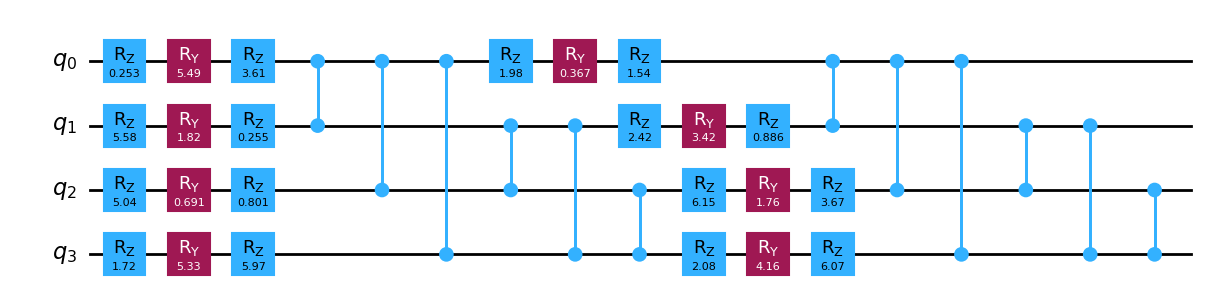

In [91]:
import numpy as np

def anzats_eficiente(rotaciones,qubits,seleccion):

    qc = QuantumCircuit(qubits)
    rng = np.random.default_rng()

    for rotacion in range(rotaciones):
        for qubit in range(qubits):
            theta1,theta2,theta3 = np.random.uniform(0,2*np.pi,3)
            qc.rz(theta1,qubit)
            qc.ry(theta2,qubit)
            qc.rz(theta3,qubit)

        if seleccion == 'lineal':
            for qubit in range(qubits-1):
                qc.cz(qubit,qubit+1)
        elif seleccion == 'circular':
            for qubit in range(qubits-1):
                qc.cz(qubit,qubit+1)
                qc.cz(qubits-1,0)
        elif seleccion == 'full':
            for i in range(qubits):
                for j in range(i+1,qubits):
                    qc.cz(i,j)

    return qc


circuito = anzats_eficiente(rotaciones=2,qubits=4,seleccion='full')
circuito.draw("mpl")


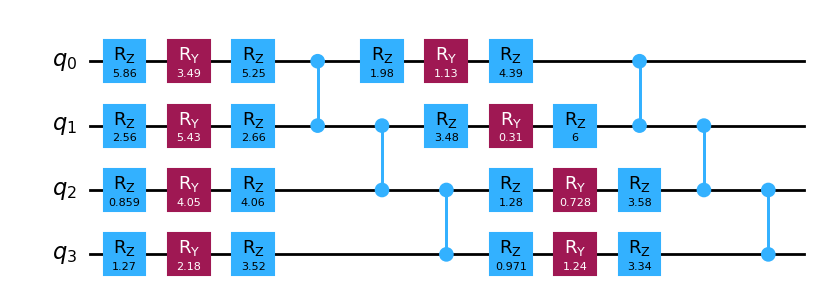

In [92]:
anzats_eficiente(rotaciones=2,qubits=4,seleccion='lineal').draw("mpl")

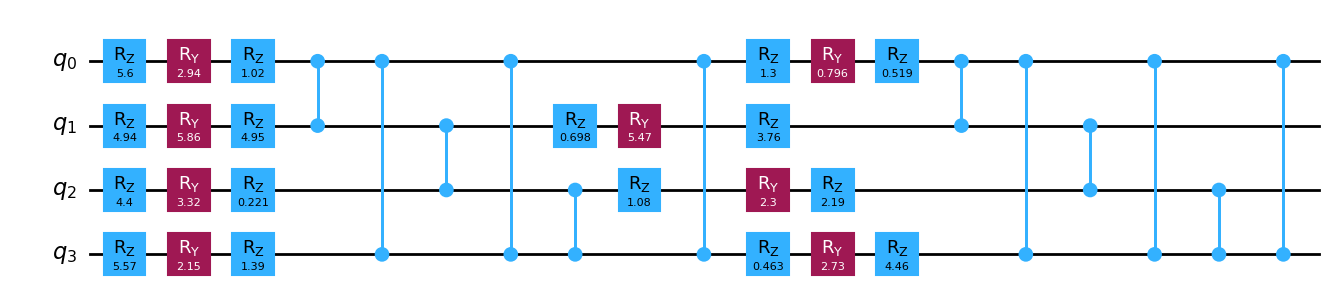

In [93]:
anzats_eficiente(rotaciones=2,qubits=4,seleccion='circular').draw("mpl")

 El nivel más alto de complejidad respecto al ansatz eficiente en hardware se encuentran los circuitos cuánticos parametrizados (PQC) que también incluyen compuertas de dos qubits parametrizadas.

 * **Compuertas de dos Qubits parametrizadas**: las compuertas controladas de dos qubits parametrizadas tienen la forma $CU(\theta)_{jk}$, donde j es el índice del qubit de control, k es el índice del qubit controlado   para simplificar la notación, al qubit 0 como el de control y al qubit 1 como el controlado, podemos escribir.

 $$
 \text{CU}(\theta)_{01} = |0\rangle \langle 0 | \otimes I + |1\rangle \langle 1| \otimes U(\theta)
 $$

Ejemplos de compuertas de dos qubits parametrizadas incluyen la compuerta CNOT parametrizada:

$$
\text{CNOT}_{jk}(\theta) = CRX(\theta)_{jk} \quad (6.15)
$$

donde la compuerta controlada de un solo qubit es una rotación de Pauli-X $RX(\theta)$; y la compuerta CZ parametrizada:

$$
\text{CZ}_{jk}(\theta) = CRZ(\theta)_{jk} \quad (6.16)
$$

donde la compuerta controlada de un solo qubit es una rotación de Pauli-Z $RZ(\theta)$. Nótese que, según (6.3)-(6.5), las compuertas CNOT y CZ parametrizadas recuperan las compuertas CNOT y CZ estándar al fijar $\theta = -\pi$, salvo por un término de fase.

* **Rotaciones de Pauli de dos qubits**: Para un sistema con dos qubits, una rotación Pauli $PQ$ de dos qubits se define como la matriz unitaria:

$$
RPQ(\theta) = \exp\left( -i \frac{\theta}{2} (P \otimes Q) \right) \quad (6.17)
$$

donde $P$ y $Q$ se eligen entre los cuatro operadores de Pauli $\{I, X, Y, Z\}$. Un ejemplo común es la compuerta de rotación Pauli ZZ definida por la unitaria:

$$
RZZ(\theta) = \exp\left( -i \frac{\theta}{2} Z \otimes Z \right) \quad (6.18)
$$

A pesar de la presencia del producto $P \otimes Q$ en (6.17), las rotaciones de Pauli de dos qubits generalmente no son operadores locales. En este sentido, nótese que:

$$
RZZ(-\pi) = i(Z \otimes Z)
$$

por lo que, con la elección especial $\theta = -\pi$, la compuerta $RZZ(-\pi)$ consiste en dos operaciones locales de un solo qubit, mientras que esto no es cierto en general. Para cualquier valor de $\theta$, la rotación Pauli ZZ puede implementarse como una cascada de compuerta CNOT, rotación Pauli-Z y otra CNOT.


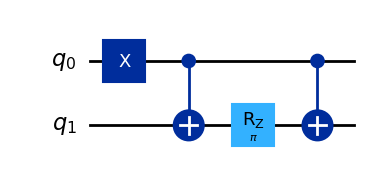

In [94]:
qcr = QuantumCircuit(2)

qcr.x(0)
qcr.cx(0,1)
qcr.rz(np.pi,1)
qcr.cx(0,1)

qcr.draw('mpl')


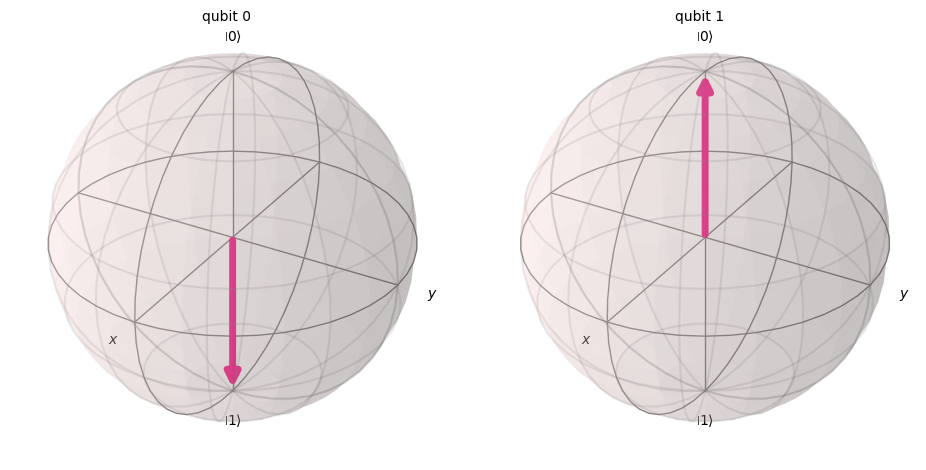

In [95]:
state_vector = Statevector.from_instruction(qcr)
state_vector.draw('bloch')

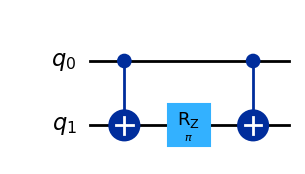

In [96]:
qcr2  = QuantumCircuit(2)


qcr2.cx(0,1)
qcr2.rz(np.pi,1)
qcr2.cx(0,1)

qcr2.draw('mpl')

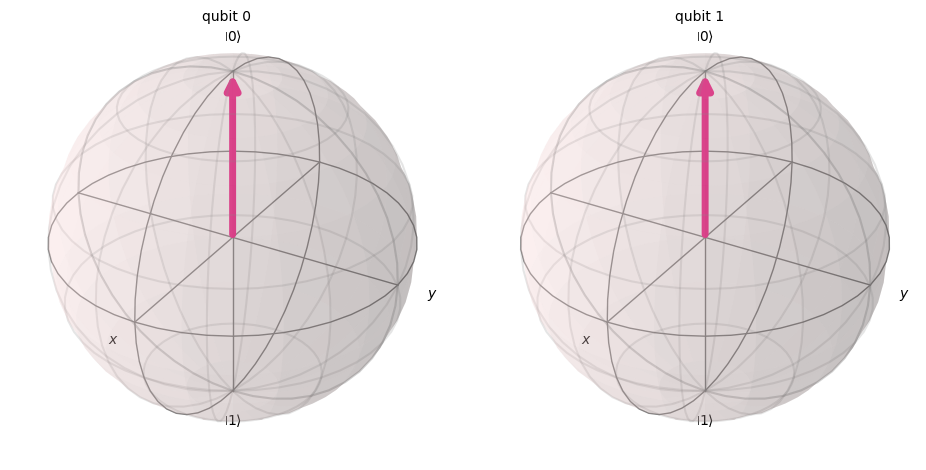

In [97]:
state_vector2 = Statevector.from_instruction(qcr2)
state_vector2.draw('bloch')


## Funciones de costo en aprendizaje automático cuántico

---


En el aprendizaje automático cuántico, el objetivo es minimizar una función de costo $L(\boldsymbol{\theta})$ con respecto a los parámetros $\boldsymbol{\theta}$ de un circuito cuántico parametrizado , utilizando un optimizador clásico. Esta función de costo depende del estado cuántico generado por el PQC y, posiblemente, de datos clásicos.

El PQC aplica una unidad cuántica $U(\boldsymbol{\theta})$ al estado base $|0\rangle$, generando:

$$
|\psi(\boldsymbol{\theta})\rangle = U(\boldsymbol{\theta}) |0\rangle
$$

En su forma más general, la función de costo depende de  un conjunto de datos clásicos $D$, los valores esperados de un conjunto de $N_O$ observables $\{ O_j \}_{j=1}^{N_O}$, evaluados sobre el estado generado:

$$
L(\boldsymbol{\theta}) = f\left(D, \left\{ \langle O_j \rangle_{|\psi(\boldsymbol{\theta})\rangle} \right\}_{j=1}^{N_O} \right)
$$

## Valor esperado de un observable

Sea $O$ un observable La probabilidad de obtener el resultado $x$ al medir $O$ en el estado $|\psi(\boldsymbol{\theta})\rangle$ es:

$$
p(x|\boldsymbol{\theta}) = |\langle v_x | \psi(\boldsymbol{\theta}) \rangle|^2
$$

El valor esperado del observable $O$ es entonces:

$$
\langle O \rangle_{|\psi(\boldsymbol{\theta})\rangle} = \sum_{x=0}^{2^n - 1} p(x|\boldsymbol{\theta}) \cdot o_x
$$

o en notación de esperanza matemática:

$$
\langle O \rangle_{|\psi(\boldsymbol{\theta})\rangle} = \mathbb{E}_{p(x|\boldsymbol{\theta})}[o_x]
$$

Un caso básico es minimizar el valor esperado de un observable En muchos casos prácticos, la función de costo se reduce a:

$$
L(\boldsymbol{\theta}) = \langle O \rangle_{|\psi(\boldsymbol{\theta})\rangle}
$$

y el objetivo  es resolver el problema de optimización:

$$
\min_{\boldsymbol{\theta}} L(\boldsymbol{\theta}) = \min_{\boldsymbol{\theta}} \mathbb{E}_{p(x|\boldsymbol{\theta})}[o_x]
$$





# Optimización basada en gradientes

---

La optimización de funciones de costo en aprendizaje automático cuántico  adopta la forma de un problema de optimización estocástica, expresado como la minimización de un valor esperado sobre una distribución de muestreo, denotado por:

$$
\min_{\theta} \mathbb{E}_{x \sim p(x|\theta)} [L(x, \theta)]
$$

En algunos casos, la distribución $p(x|\theta)$ es explícitamente conocida y diferenciable, mientras que en otros, solo se generar muestras que siguan dicha distribución, por lo que el modelo puede generar muestras $x \sim p(x|\theta)$, pero no se puede calcular directamente $p(x|\theta)$.

En el caso de modelos cuánticos, como los circuitos cuánticos parametrizados (PQC), la probabilidad de observar una salida $x$ se determina mediante la regla de Born,  pero sin una representación explícita de $p(x|\theta)$.

Para resolver estos problemas, se emplea descenso estocástico de gradiente (SGD). En cada iteración, se estima el gradiente de la función de costo respecto a los parámetros del modelo $\theta$:

$$
\nabla L(\theta) =\begin{bmatrix}\frac{\partial L(\theta)}{\partial \theta_1} \\
\vdots \\\frac{\partial L(\theta)}{\partial \theta_D}\end{bmatrix}
$$

La estimacion denotada por $\widehat{\nabla L}(\theta)$, se obtiene a partir de $N_S$ muestras generadas con un valor fijo $\theta_0$, es decir, $x \sim p(x|\theta_0)$. Dado que las muestras se obtienen por medición cuántica, la estimación del gradiente está sujeta a ruido de muestreo (shot noise).

La actualización de los parámetros se realiza mediante :

$$
\theta \leftarrow \theta - \gamma \widehat{\nabla L}(\theta)
$$

siendo $\gamma > 0$  y representa la tasa de aprendizaje.

En modelos clásicos explícitos, algoritmos como REINFORCE son comunes para estimar $\nabla L(\theta)$. En cambio, en modelos implícitos, como los cuánticos, se requieren métodos específicos para estimar el gradiente a partir de muestras, dada la ausencia de una forma cerrada para $p(x|\theta)$.


#Diferenciacion numerica

---

La diferenciación numérica es un método para estimar el gradiente de una función de costo $L(\theta)$, cuando no se dispone de una expresión analítica de dicha derivada. En este enfoque, cada componente $\frac{\partial L(\theta)}{\partial \theta_d}$ del gradiente se aproxima mediante:

$$
\frac{\partial L(\theta)}{\partial \theta_d} \approx \frac{L(\theta + \varepsilon e_d) - L(\theta - \varepsilon e_d)}{2\varepsilon}
$$

donde $\varepsilon$ es un pequeño número positivo y $e_d$ es un vector one-hot unitario en la dirección del parámetro $\theta_d$. Esta aproximación tiene un error de orden $O(\varepsilon^2)$, por lo que su precisión mejora al reducir $\varepsilon$, aunque esto también puede incrementar la sensibilidad al ruido.

El segundo aso es estimar ambos terminos via promedios empiricos  de multiples mediciones del estado $|\psi(\theta)\rangle$ del PQC

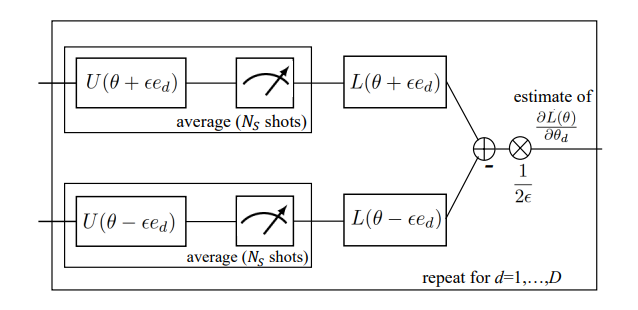

Para ello, se evalúan dos versiones del circuito cuántico: una con $\theta + \varepsilon e_d$ y otra con $\theta - \varepsilon e_d$, ejecutando cada una $N_S$ veces para estimar los valores esperados del observable $O$:

$$
L(\theta + \varepsilon e_d) = \langle O \rangle_{|\psi(\theta + \varepsilon e_d)\rangle}
$$

$$
L(\theta - \varepsilon e_d) = \langle O \rangle_{|\psi(\theta - \varepsilon e_d)\rangle}
$$

Para obtener la estimación completa del gradiente $\nabla L(\theta)$ en un modelo con $D$ parámetros, se necesitan $2 D N_S$ mediciones. Esta estrategia es útil aunque costosa en términos computacionales, ya que requiere duplicar las ejecuciones por cada parámetro ajustado.


# Ejemplo


Consideramos el estado cuántico generado por una rotación $R_y(\theta)$ sobre $|0\rangle$:

$$
|\psi(\theta)\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + \sin\left(\frac{\theta}{2}\right)|1\rangle
$$

y el observable:

$$
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

El valor esperado del observable $Z$ en ese estado es:

$$
L(\theta) = \langle \psi(\theta) | Z | \psi(\theta) \rangle = \cos^2\left(\frac{\theta}{2}\right) - \sin^2\left(\frac{\theta}{2}\right) = \cos(\theta)
$$

Queremos estimar $\frac{dL(\theta)}{d\theta}$ usando la fórmula:

$$
\frac{dL(\theta)}{d\theta} \approx \frac{L(\theta + \varepsilon) - L(\theta - \varepsilon)}{2\varepsilon}
$$

tomamos los  valores:

* $\theta = \frac{\pi}{4}$
* $\varepsilon = 0.01$

Calculamos:

$$
L\left(\frac{\pi}{4} + 0.01\right) = \cos\left(\frac{\pi}{4} + 0.01\right) \approx \cos(0.7954) \approx 0.7000
$$

$$
L\left(\frac{\pi}{4} - 0.01\right) = \cos\left(\frac{\pi}{4} - 0.01\right) \approx \cos(0.7754) \approx 0.7141
$$

Por tanto:

$$
\frac{dL}{d\theta} \approx \frac{0.7000 - 0.7141}{2 \cdot 0.01} = \frac{-0.0141}{0.02} = -0.705
$$

Sabemos que $L(\theta) = \cos(\theta)$, por lo tanto:

$$
\frac{dL}{d\theta} = -\sin(\theta)
$$

Con $\theta = \frac{\pi}{4}$, se tiene:

$$
\frac{dL}{d\theta} = -\sin\left(\frac{\pi}{4}\right) = -\frac{\sqrt{2}}{2} \approx -0.7071
$$


En redes neuronales se utiliza el algortimo de reto propagacion, que se realiza en dos sentidos, lo cual es mas eficiente que la diferenciacion numerica que  necesita un número de ejecuciones proporcional al número total de parámetros $D$. En el aprendizaje automático cuántico no existe un análogo directo de la retropropagación clásica debido a que los PQC solo pueden accederse mediante mediciones, lo que lo hace mas costoso, aunque cuando las compuertas parametrizadas del circuito tienen la forma:

$$
U_d(\theta) = \exp \left(-i \frac{\theta_d}{2}P_d\right)
$$



donde $P_d$ es una cadena de operadores de Pauli, puede aplicarse la*regla del desplazamiento de parámetros, la cual permite calcular exactamente la derivada parcial del valor esperado de un observable sin recurrir a aproximaciones numéricas:

$$
\frac{\partial L(\theta)}{\partial \theta_d} = \frac{L\left(\theta + \frac{\pi}{2} e_d\right) - L\left(\theta - \frac{\pi}{2} e_d\right)}{2}.
$$

Aunque esta regla requiere también $2 D N_S$ mediciones  su ventaja sobre la diferenciación numérica es que proporciona un valor exacto sin necesidad de afinar un parámetro pequeño como $\varepsilon$.

* El método de descenso por gradiente tiene limitaciones en modelos cuánticos con muchos qubits debido al crecimiento exponencial del espacio de Hilbert en relación con el número de parámetrosvy como  consecuencia es el problema de las barren plateaus, donde las derivadas del costo tienden exponencialmente a cero al aumentar $n$, haciendo ineficiente el aprendizaje.

* Para mitigar este problema, se proponen inicializaciones optimizadas, ansatzes adaptados al problema , y métodos alternativos al descenso por gradiente. Estas alternativas incluyen técnicas de optimización local más avanzadas  y estrategias globales que emplean funciones objetivo sustitutas para estimar el valor de $L(\theta)$ sin depender directamente de gradientes pequeños.



#Variacional quantum eigensolver

---



Un problema QUBO se formula como:

$$
\min_{\tilde{x} \in \{-1, 1\}^n} f(\tilde{x}) = \sum_{k=0}^{n-1} \sum_{j=0}^{k} a_{k,j} \tilde{x}_k \tilde{x}_j + \sum_{k=0}^{n-1} b_k \tilde{x}_k
$$

donde los coeficientes $a_{k,j}$ y $b_k$ definen la función objetivo $f(\tilde{x})$, y $\tilde{x}$ es un vector binario con valores en $\{-1,1\}^n$. Resolver este problema de forma exacta implica buscar en un espacio de tamaño exponencial en $n$.

Para facilitar su tratamiento, especialmente en computación cuántica, se reescribe como un problema sobre vectores binarios estándar $x \in \{0,1\}^n$, usando la transformación:

$$
\tilde{x}_k = 1 - 2x_k
$$

Esta relación se aplica elemento a elemento


## Representación como Observable Cuántico

Para resolver el problema QUBO mediante un PQC , se asocia la función objetivo $f(\tilde{x})$ a un **observable cuántico** $F$ sobre $n$ qubits:

$$
F = \sum_{k=0}^{n-1} \sum_{j=0}^{k} a_{k,j} Z_k Z_j + \sum_{k=0}^{n-1} b_k Z_k
$$

Este operador es conocido como el hamiltoniano de Ising, y cada término corresponde a una cadena de Pauli con operadores $Z$ o la identidad $I$.


El observable $F$ tiene como autovectores los estados de la base computacional $\{ |x\rangle \}_{x=0}^{2^n - 1}$, donde $x \in \{0,1\}^n$. Cada estado $|x\rangle$ representa una posible solución del problema QUBO, mediante  $\tilde{x} = 1 - 2x$.

Cada autovector $|x\rangle$ tiene autovalor igual al valor de la función objetivo evaluada en $\tilde{x}$:

   $$
   F |x\rangle = f(\tilde{x}) |x\rangle
   $$

Esto se puede demostrar observando que los operadores de Pauli $Z_k$ cumplen:

   $$
   Z_k Z_j |x\rangle = \tilde{x}_k \tilde{x}_j |x\rangle \quad \text{y} \quad Z_k |x\rangle = \tilde{x}_k |x\rangle \tag{6.36}
   $$

   Entonces, aplicando $F$ a $|x\rangle$:

   $$
   \begin{aligned}
   F|x\rangle &= \sum_{k=0}^{n-1} \sum_{j=0}^{k} a_{k,j} Z_k Z_j |x\rangle + \sum_{k=0}^{n-1} b_k Z_k |x\rangle \\
   &= \sum_{k=0}^{n-1} \sum_{j=0}^{k} a_{k,j} \tilde{x}_k \tilde{x}_j |x\rangle + \sum_{k=0}^{n-1} b_k \tilde{x}_k |x\rangle \\
   &= f(\tilde{x}) |x\rangle
   \end{aligned}
   $$


La función objetivo del QUBO se representa como un observable $F$, y resolver el QUBO equivale a encontrar el **estado base $|x\rangle$** que minimiza el valor esperado de $F$.


$$
\min_{\tilde{x} \in \{-1, 1\}^n} f(\tilde{x}) = \min_{|\psi\rangle} \langle \psi | F | \psi \rangle  = f(\tilde{x}^*)
$$

Donde $|\psi\rangle$ es un estado cuántico de $n$ qubits. El estado $|\psi^*\rangle$ que minimiza el valor esperado $\langle \psi | F | \psi \rangle$ corresponde al autovector $|x^*\rangle$ de $F$, con solución óptima:

$$
\tilde{x}^* = 1 - 2x^*
$$


El estado parametrizado se introduce un ansatz  para un PQC, que implementa una unidad unitaria:

$$
|\psi(\boldsymbol{\theta})\rangle = U(\boldsymbol{\theta})|0\rangle \tag{6.41}
$$

donde $\boldsymbol{\theta}$ es un vector de parámetros clásicos.El objetivo del VQE es minimizar el valor esperado del observable $F$ respecto al estado cuántico parametrizado:

$$
\min_{\theta} \{  L(\boldsymbol{\theta}) = \langle F \rangle_{|\psi(\boldsymbol{\theta})\rangle} = \langle \psi(\boldsymbol{\theta})|F|\psi(\boldsymbol{\theta}) \rangle = \langle 0 | U^\dagger(\boldsymbol{\theta}) F U(\boldsymbol{\theta}) | 0 \rangle \}
$$

Esto  se ejecuta mediante una optimización clásica sobre los parámetros $\boldsymbol{\theta}$.

La solución del problema VQE proporciona típicamente una cota superior para el valor mínimo de la función objetivo asociada al problema QUBO:

$$
\min_{\boldsymbol{\theta}} L(\boldsymbol{\theta}) \geq \min_{|\psi\rangle} \langle \psi | F | \psi \rangle = f(\tilde{x}^*) \tag{6.43}
$$

Si el ansatz es suficientemente flexible y existe un valor $\boldsymbol{\theta}^*$ tal que:

$$
|\psi(\boldsymbol{\theta}^*)\rangle = |x^*\rangle
$$

entonces la solución del VQE coincide con la solución óptima del problema QUBO. Esto puede lograrse incluso con un ansatz simple basado en rotaciones Pauli-Y.



En la práctica, la optimización exacta del problema  no es posible debido a restricciones tecnológicas y ruido. Se utilizan métodos como el*descenso de gradiente estocástico u otras variantes similares. La calidad de la solución depende del paisaje de la función $L(\boldsymbol{\theta})$ y de la capacidad del circuito para explorar el espacio de estados.

Una vez encontrado un valor óptimo aproximado $\boldsymbol{\theta}^*$, existen dos maneras de obtener información sobre la solución del QUBO:

1. **Valor mínimo estimado**: mediante la expectativa $\langle F \rangle_{|\psi(\boldsymbol{\theta}^*)\rangle}$, se estima el valor mínimo de la función objetivo.
2. **Solución binaria aproximada**: mediante una única medición del estado $|\psi(\boldsymbol{\theta}^*)\rangle$, se obtiene un vector $|x\rangle$ de la base computacional. El correspondiente vector firmado es:

   $$
   \tilde{x} = 1 - 2x
   $$

   y se considera una **aproximación de la solución óptima** $\tilde{x}^*$, por regla de Born.

El observable $F$ puede descomponerse en cadenas de Pauli. Para el caso de QUBO:

$$
\langle F \rangle_{|\psi(\boldsymbol{\theta})\rangle} =
\sum_{k=0}^{n-1} \sum_{j=0}^{k-1} a_{k,j} \langle Z_k Z_j \rangle_{|\psi(\boldsymbol{\theta})\rangle} +
\sum_{k=0}^{n-1} b_k \langle Z_k \rangle_{|\psi(\boldsymbol{\theta})\rangle} \tag{6.44}
$$

Este valor esperado se estima por promedios empíricos de muchas mediciones del estado $|\psi(\boldsymbol{\theta})\rangle$ en la base computacional. Existen en total $\frac{n(n-1)}{2} + n$ términos que se pueden medir eficientemente, ya que son observables compatibles.



#Ejemplo


Tomemos el siguiente operador Hermítico sobre 2 qubits:

$$
\hat{H} =   
$$

ahora el algoritmo de VQE nos dice que debemos minimizar el valor esperado
$$
E(\theta) = \langle \psi (\theta)| \hat{H} |\psi(\theta) \rangle
$$
entonces
$$
E(\theta) = \langle \psi (\theta)| (Z_0Z_1 + X_0) |\psi(\theta) \rangle = \langle \psi (\theta)|Z_0Z_1 |\psi(\theta) \rangle + \langle \psi (\theta)|X_0|\psi(\theta) \rangle
$$
el problema de odtimizacion seria:
$$
\min_{\theta}  \langle \psi (\theta)|Z_0Z_1 |\psi(\theta) \rangle + \langle \psi (\theta)|X_0|\psi(\theta) \rangle
$$



Para este ejemplo, el anzats es:

$$
|\psi(\theta_0, \theta_1)\rangle = \text{CZ} \cdot \left( RY(\theta_1) \otimes RY(\theta_0) \right) |00\rangle
$$

Entonces, la función objetivo a minimizar es:

$$
E(\boldsymbol{\theta}) = \langle \psi_{\boldsymbol{\theta}} | \hat{H} | \psi_{\boldsymbol{\theta}} \rangle = \sum_i c_i \langle \psi_{\boldsymbol{\theta}} | P_i | \psi_{\boldsymbol{\theta}} \rangle
$$



la optimizacion se puede realizar por el  descenso del gradiente, Adam, etc.

$$
\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - \eta \nabla_{\boldsymbol{\theta}} E(\boldsymbol{\theta}_t)
$$




In [98]:
import pennylane as qml
from pennylane import numpy as np

In [99]:
#circuito de anzats
def anzats(theta):
    qml.RY(theta[0],wires = 0)
    qml.RY(theta[1],wires = 1)
    qml.CZ(wires = [0,1])

In [100]:
dev = qml.device('default.qubit', wires = 2)

H = qml.Hamiltonian(
    [1,1], #coeficientes
    [qml.PauliZ(0) @qml.PauliZ(1), qml.PauliX(0)] #OPERADORES
                    )
@qml.qnode(dev)

def circuit(theta):
    anzats(theta)
    return qml.expval(H)

opt = qml.GradientDescentOptimizer(stepsize = 0.01)
theta = np.array([0.01, 0.01], requires_grad=True)

In [101]:
for i in range(500):
    theta = opt.step(circuit, theta)
    if i % 10 == 0:
        energy = circuit(theta)
        print(f"Iter {i:2d} | Energy = {energy:.6f}")

Iter  0 | Energy = 1.000050
Iter 10 | Energy = 0.890348
Iter 20 | Energy = 0.759388
Iter 30 | Energy = 0.607043
Iter 40 | Energy = 0.435078
Iter 50 | Energy = 0.247451
Iter 60 | Energy = 0.050195
Iter 70 | Energy = -0.149231
Iter 80 | Energy = -0.343018
Iter 90 | Energy = -0.524187
Iter 100 | Energy = -0.687524
Iter 110 | Energy = -0.830025
Iter 120 | Energy = -0.950820
Iter 130 | Energy = -1.050736
Iter 140 | Energy = -1.131716
Iter 150 | Energy = -1.196272
Iter 160 | Energy = -1.247058
Iter 170 | Energy = -1.286597
Iter 180 | Energy = -1.317129
Iter 190 | Energy = -1.340558
Iter 200 | Energy = -1.358451
Iter 210 | Energy = -1.372064
Iter 220 | Energy = -1.382393
Iter 230 | Energy = -1.390213
Iter 240 | Energy = -1.396124
Iter 250 | Energy = -1.400586
Iter 260 | Energy = -1.403951
Iter 270 | Energy = -1.406488
Iter 280 | Energy = -1.408399
Iter 290 | Energy = -1.409838
Iter 300 | Energy = -1.410921
Iter 310 | Energy = -1.411737
Iter 320 | Energy = -1.412350
Iter 330 | Energy = -1.4128

#JUSTIFICACION
---

El desglose matematico que demuestra que el resultado es correcto es el siguiente

Tenemos:
$$
\hat{H} = Z_0 Z_1 + X_0
$$

Queremos encontrar:

$$
E_{\min} = \min_{|\psi\rangle} \langle \psi | \hat{H} | \psi \rangle
$$

Recordemos las matrices de Pauli:

* $Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$
* $X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

Entonces:

$$
Z_0 Z_1 = Z \otimes Z$ =
Z \otimes Z = \begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}\otimes\begin{bmatrix}
1 & 0 \\ 0 & -1\end{bmatrix}=\begin{bmatrix}1 & 0 & 0 & 0 \\0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\0 & 0 & 0 & 1\end{bmatrix}
$$

$$ X_0 = X \otimes I  = X \otimes I = \begin{bmatrix}0 & 1 \\1 & 0\end{bmatrix}
\otimes\begin{bmatrix}1 & 0 \\0 & 1\end{bmatrix}=\begin{bmatrix}0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\1 & 0 & 0 & 0 \\0 & 1 & 0 & 0\end{bmatrix}
$$

La matriz total del Hamiltoniano

$$
H = Z_0 Z_1 + X_0 =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & -1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & 1
\end{bmatrix}
$$

Encontramos  los autovalores del Hamiltoniano
$$
E_{\min} = \min \text{eig}(H)
$$
estos son: [-1.41421356, -1.0, 1.0, 1.41421356]

El valor mínimo teórico del Hamiltoniano es:

$$
E_{\min} = -\sqrt{2} \approx -1.4142
$$




#Apredizaje no supervisado para modelos generativos

Dado un conjunto binario de datos el  objetivo del aprendizaje no supervisado mediante modelos generativos es entrenar un modelo probabilístico capaz de generar cadenas binarias $\mathbf{x} \in \{0,1\}^n$ que se ajusten mediante una distribucion  optimizada  a la de un conjunto de datos de entrenamiento $D = \{\mathbf{x}_1, \dots, \mathbf{x}_{|D|}\}$, compuesto por $|D|$ cadenas de $n$-cbits. Por ejemplo, se puede interpretar $\mathbf{x}$ como una imagen en blanco y negro aplanada en un vector, donde los valores 1 y 0 indican píxeles negros y blancos. El objetivo es que el modelo aprenda a generar imágenes similares a las del conjunto $D$.

Un modelo generativo parametrizado opera en dos fases:
*  En la fase de generación de muestras, se produce una cadena aleatoria $\mathbf{x}$ a partir de una distribución probabilística dependiente de parámetros, $p(\mathbf{x}|\boldsymbol{\theta})$, donde $\boldsymbol{\theta}$ es el vector de parámetros del modelo. Una vez entrenado, el modelo puede muestrear cadenas según esta distribución.

* En la fase de entrenamiento, se optimiza el vector $\boldsymbol{\theta}$ mediante una función de pérdida $\ell(\mathbf{x}|\boldsymbol{\theta})$, que evalúa cuán adecuado es el modelo $p(\mathbf{x}|\boldsymbol{\theta})$ para generar un ejemplo específico $\mathbf{x}$. Esta función, también llamada función de puntuación, debe ser decreciente con respecto a $p(\mathbf{x}|\boldsymbol{\theta})$, de modo que si el modelo asigna baja probabilidad a un dato $\mathbf{x}$, reciba una pérdida mayor.

Una función  utilizada es la pérdida logarítmica o entropía cruzada:

$$
\ell(\mathbf{x}|\boldsymbol{\theta}) = -\log p(\mathbf{x}|\boldsymbol{\theta})
\tag{6.45}
$$

Sin embargo, si $p(\mathbf{x}|\boldsymbol{\theta}) = 0$, esta pérdida no está definida. Para mitigar este problema, se puede usar una versión regularizada:

$$
\ell(\mathbf{x}|\boldsymbol{\theta}) = -\log \max(\varepsilon, p(\mathbf{x}|\boldsymbol{\theta}))
$$

donde $\varepsilon > 0$ es un valor pequeño.

En el aprendizaje automático cuántico, una alternativa frecuente es la pérdida lineal:

$$
\ell(\mathbf{x}|\boldsymbol{\theta}) = 1 - p(\mathbf{x}|\boldsymbol{\theta})
$$

A partir de la función de pérdida individual, se define la **pérdida de entrenamiento** como el promedio empírico sobre los datos:

$$
L_D(\boldsymbol{\theta}) = \frac{1}{|D|} \sum_{\mathbf{x} \in D} \ell(\mathbf{x}|\boldsymbol{\theta})
$$

El entrenamiento busca minimizar esta pérdida:

$$
\min_{\boldsymbol{\theta}} L_D(\boldsymbol{\theta})
$$

lo cual se  interpreta como una forma de medir la distancia entre la distribución empírica de los datos y la distribución modelada $p(\mathbf{x}|\boldsymbol{\theta})$.



### Modelos generativos cuánticos: Born Machines

---

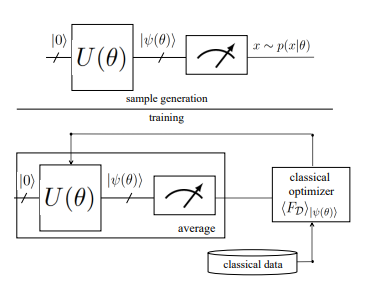

### Generación de muestras

Como se ilustra en la parte superior  para generar una cadena binaria aleatoria se ejecuta una sola vez el PQC y se realiza una medición estándar en los $n$ qubits. La medición produce una cadena $\mathbf{x}\sim p(\mathbf{x}\mid\boldsymbol\theta)$, donde

$$
p(\mathbf{x}\mid\boldsymbol\theta)=\bigl|\langle \mathbf{x}\mid\psi(\boldsymbol\theta)\rangle\bigr|^{2},
$$

obtenida de  al considerar la base computacional $\lvert v_{\mathbf{x}}\rangle=\lvert\mathbf{x}\rangle$ con $\mathbf{x}\in\{0,1\}^n$. Por ello, los modelos generativos basados en PQC reciben el nombre de Born machines.

Una muestra $\mathbf{x}\sim p(\mathbf{x}\mid\boldsymbol\theta)$ se genera con una sola ejecución del circuito pues  no hace falta repetirlo para promediar el ruido de disparos  de la medición.Aunque  ese ruido resulta útil:ya que introduce alotariedad en las muestras rasgo habitual de los modelos probabilísticos .

El término $|\langle\mathbf{x}\mid\psi(\boldsymbol\theta)\rangle|^{2}$ puede verse como la **fidelidad** entre los estados $\lvert\mathbf{x}\rangle$ y $\lvert\psi(\boldsymbol\theta)\rangle$  una medida de cuán “confundibles” son ambos estados mediante mediciones. Por tanto, una pérdida que sea función decreciente de dicha fidelidad cuantifica lo bien —o, mejor, lo mal— que el estado $\lvert\psi(\boldsymbol\theta)\rangle$ representa el dato $\mathbf{x}$ codificado en $\lvert\mathbf{x}\rangle$.



### Entrenamiento mediante minimización de riesgo empírico

Consideremos ahora el problema ERM usando la pérdida lineal

$$
\ell(\mathbf{x}\mid\boldsymbol\theta)=1-p(\mathbf{x}\mid\boldsymbol\theta)=1-\bigl|\langle\mathbf{x}\mid\psi(\boldsymbol\theta)\rangle\bigr|^{2}.
$$

Una Born machine es un modelo de probabilidad implícito ya que puede generar muestras $\mathbf{x}\sim p(\mathbf{x}\mid\boldsymbol\theta)$, pero no proporciona un modo explícito de calcular $p(\mathbf{x}\mid\boldsymbol\theta)$. Por ello, la pérdida no puede computarse ni derivarse directamente, sin embargo  el problema ERM puede reescribirse como un problema estocástico del tipo .

Primero expresamos $p(\mathbf{x}\mid\boldsymbol\theta)$ como

$$
p(\mathbf{x}\mid\boldsymbol\theta)=
\langle\psi(\boldsymbol\theta)\lvert F_{\mathbf{x}}\rvert\psi(\boldsymbol\theta)\rangle
\;=\;
\langle F_{\mathbf{x}}\rangle_{|\psi(\boldsymbol\theta)\rangle},
$$

donde

$$
F_{\mathbf{x}}=\lvert\mathbf{x}\rangle\langle\mathbf{x}\rvert
$$

es un observable asociado a la proyección sobre $\lvert\mathbf{x}\rangle$. Así, la pérdida de entrenamiento se convierte en

$$
\begin{aligned}
L_{D}(\boldsymbol\theta)
&=\frac{1}{|D|}\sum_{\mathbf{x}\in D}\bigl[1-\langle\psi(\boldsymbol\theta)\lvert F_{\mathbf{x}}\rvert\psi(\boldsymbol\theta)\rangle\bigr]\\
&=\langle\psi(\boldsymbol\theta)\lvert F_{D}\rvert\psi(\boldsymbol\theta)\rangle
\;=\;
\langle F_{D}\rangle_{|\psi(\boldsymbol\theta)\rangle},
\end{aligned}
$$

donde el observable dependiente del conjunto de datos es

$$
F_{D}=I-\frac{1}{|D|}\sum_{\mathbf{x}\in D}F_{\mathbf{x}}.
\tag{6.55}
$$

En forma equivalente,

$$
F_{D}=\sum_{\mathbf{x}} \bigl[\,1-p_{D}(\mathbf{x})\,\bigr]\lvert\mathbf{x}\rangle\langle\mathbf{x}\rvert,
\tag{6.56}
$$

con

$$
p_{D}(\mathbf{x})=\frac{\text{número de veces que } \mathbf{x} \text{ aparece en }{|D|}
$$

la distribución empírica de los datos. Medir $F_{D}$ requiere una medición estándar en la base computacional y asignar el valor $1-p_{D}(\mathbf{x})$ al resultado observado $\mathbf{x}$.

Minimizar la esperanza $\langle F_{D}\rangle$ busca alinear el estado $\lvert\psi(\boldsymbol\theta)\rangle$ con aquellos $\lvert\mathbf{x}\rangle$ que maximizan $p_{D}(\mathbf{x})$, es decir, con los modos más probables de la distribución empírica.

Aunque no se capturar distribuciones multimodales complejas la minimizacion del riesgo empirico. Otra opcion es minimizar otras métricas de distancia entre la distribución del modelo $p(\mathbf{x}\mid\boldsymbol\theta)$ y la distribución empírica $p_{D}(\mathbf{x})$, siempre que dichas métricas puedan estimarse exclusivamente a partir de muestras de ambas distribuciones; estas métricas se denominan estimadores de dos muestras.

Un ejemplo  lo proporcionan las métricas de probabilidad integrales.  Para dos distribuciones $p$ y $q$, una IPM se define como

$$
\text{IPM}(p,q)=\max_{T(\cdot)\in\mathcal{T}}
\bigl\{\langle T(\mathbf{x})\rangle_{p}-\langle T(\mathbf{x})\rangle_{q}\bigr\},

$$

donde $\mathcal{T}$ especifica la clase de funciones de prueba $T(\cdot)$. Ejemplos destacados:

* Distancia de Wasserstein: $\mathcal{T}$ es el conjunto de funciones 1‑Lipschitz.
* Maximum Mean Discrepancy (MMD).
* Distancias de Stein.

Para entrenar un modelo cuántico generativo con una IPM, el proceso alterna dos pasos:

1. Con un $\boldsymbol\theta$ fijo se generan muestras $\mathbf{x}\sim p(\mathbf{x}\mid\boldsymbol\theta)$ y, junto con los datos $D$, se estima la distancia IPM; esto implica optimizar la función de prueba $T$.
2. Con $T$ fijo, se minimiza la IPM respecto a $\boldsymbol\theta$; dada una función $T$ fija, el término resultante entra dentro del marco de optimización estocástica descrito en la sección 6.5.

Así se supera la limitación de capturar sólo los picos de $p_{D}$, permitiendo ajustar distribuciones más complejas.




# Ejemplo:


Queremos que el modelo produzca por ejemplo las cadenas $\mathbf{x}\in\{00,01,10,11\}$ con la distribución

$$
p_{\mathrm{target}}(00)=0.10,\quad
p_{\mathrm{target}}(01)=0.40,\quad
p_{\mathrm{target}}(10)=0.40,\quad
p_{\mathrm{target}}(11)=0.10.
$$

Un Born Machine genera muestras mediante un estado cuántico parametrizado

$$
|\psi(\boldsymbol\theta)\rangle = U(\boldsymbol\theta)|00\rangle,
$$

y la probabilidad de cada bit‑string es

$$
p_{\boldsymbol\theta}(\mathbf{x}) \;=\; |\langle \mathbf{x}\,|\,\psi(\boldsymbol\theta)\rangle|^{2}.
$$

El entrenamiento consiste en minimizar una distancia entre $p_{\boldsymbol\theta}$ y $p_{\mathrm{target}}$.
Usaremos la pérdida lineal (6.47) promediada sobre el conjunto objetivo:

$$
L(\boldsymbol\theta) \;=\;
\frac{1}{4}\sum_{\mathbf{x}} \bigl[\,1 - p_{\boldsymbol\theta}(\mathbf{x})\,\bigr] p_{\mathrm{target}}(\mathbf{x}).
$$

Equivalente en forma de esperanza:

$$
L(\boldsymbol\theta)
\;=\;
\mathbb{E}_{\mathbf{x}\sim p_{\mathrm{target}}}\!\left[\,1 - p_{\boldsymbol\theta}(\mathbf{x})\,\right].
$$


Elegimos un ansatz de una capa como en el ejemplo de QVE por qubit:

$$
U(\boldsymbol\theta)
=\Bigl[\, R_Y(\theta_{0}) \otimes R_Y(\theta_{1}) \Bigr]
 \cdot CZ,
$$

El estado resultante  es

$$
|\psi(\theta_0,\theta_1)\rangle =
c_0 c_1\,|00\rangle
+\;c_1 s_0\,|01\rangle
+\;s_1 c_0\,|10\rangle
-\;s_1 s_0\,|11\rangle,
$$

con $c_i=\cos(\theta_i/2),\; s_i=\sin(\theta_i/2)$.

Entonces

$$
\begin{aligned}
p_{\boldsymbol\theta}(00) &= (c_0 c_1)^2,\\
p_{\boldsymbol\theta}(01) &= (c_1 s_0)^2,\\
p_{\boldsymbol\theta}(10) &= (s_1 c_0)^2,\\
p_{\boldsymbol\theta}(11) &= (s_1 s_0)^2.
\end{aligned}
\tag{3}
$$

Sustituyendo  obtenemos la expresión analítica de la pérdida, pero dejaremos que PennyLane la evalúe con mediciones.




In [123]:
import pennylane as qml
from pennylane import numpy as np

# Dispositivo cuántico con probabilidades exactas
dev_bm = qml.device("default.qubit", wires=2)

def ansatz(theta):
    qml.RY(theta[0], wires=0)
    qml.RY(theta[1], wires=1)
    qml.CNOT(wires=[0, 1])

@qml.qnode(dev_bm)
def born_prob(theta):
    ansatz(theta)
    return qml.probs(wires=[0, 1])

# Distribución objetivo
p_target = np.array([0.10, 0.40, 0.40, 0.10])

# Función de pérdida cuadrática
def loss(theta):
    p_model = born_prob(theta)
    return np.sum((p_model - p_target) ** 2)  # FUE CAMBIADA PARA MEJORAR EL MODELO (PENDIENDE CAMBIAR LA MATEMTICA)

# Inicialización de parámetros (2 elementos)
theta = np.random.uniform(0, 2*np.pi, size=2, requires_grad=True)

# Optimizador
opt = qml.AdamOptimizer(stepsize=0.1)
n_iter = 150
loss_history = []

for it in range(n_iter):
    theta, cur_loss = opt.step_and_cost(loss, theta)
    loss_history.append(cur_loss)
    if it % 20 == 0:
        print(f"Iter {it:3d} | Loss = {cur_loss:.5f}")

print("\nTheta óptimo:", theta)
print("Probabilidades modelo:", born_prob(theta))

Iter   0 | Loss = 0.07926
Iter  20 | Loss = 0.00386
Iter  40 | Loss = 0.00033
Iter  60 | Loss = 0.00003
Iter  80 | Loss = 0.00001
Iter 100 | Loss = 0.00000
Iter 120 | Loss = 0.00000
Iter 140 | Loss = 0.00000

Theta óptimo: [4.71227235 2.21420727]
Probabilidades modelo: [0.10000637 0.39993532 0.40002862 0.1000297 ]


# Aprendizaje supervisado

Tal como en el aprendizaje supervisado, se parte de un conjunto de datos de entrenamiento $D = \{(x_1, y_1), \ldots, (x_{|D|}, y_{|D|})\}$, donde cada par $(x, y)$ incluye una entrada clásica $x$ (vector real) y una salida o variable objetivo $y$. Esta puede ser discreta (clasificación) o continua (regresión). El objetivo es optimizar un modelo predictivo que relacione $x$ con $y$, reflejando de forma precisa la distribución de datos subyacente.

La sección aborda:

1. Cómo codificar la entrada clásica $x$ en un estado cuántico mediante circuitos parametrizados (PQC).
2. La definición y uso de modelos cuánticos probabilísticos y deterministas a partir de la salida del PQC.


#Modelos probabilisticos

Nuestro  análisis se centra principalmente en tareas de clasificación, donde la salida $y$ es una cadena binaria de longitud $m$, con $m \leq n$, siendo $n$ el número total de qubits del sistema. Esto permite representar hasta $2^m$ clases distintas.

El funcionamiento de este tipo de modelos se divide en dos fases:

* **Inferencia:** Se utiliza un modelo ya entrenado para predecir una etiqueta $y$ dada una nueva entrada $x$. El resultado es estocástico, por lo que múltiples ejecuciones del modelo sobre el mismo $x$ pueden dar diferentes salidas, permitiendo así cuantificar la incertidumbre del clasificador.

* **Entrenamiento:** El objetivo es ajustar los parámetros $\theta$ para que el modelo probabilístico $p(y|x, \theta)$ se aproxime lo mejor posible a la distribución de datos observada. Para ello se define una función de pérdida $\ell(x, y|\theta)$, que mide cuán bien el modelo predice la etiqueta real $y$ dada la entrada $x$.

Existen dos funciones de pérdida comunes:

* La **pérdida logarítmica** :

  $$
  \ell(x, y|\theta) = -\log p(y|x, \theta)
  $$

  Esta es estándar en el aprendizaje automático clásico y penaliza fuertemente las predicciones con baja probabilidad para la etiqueta verdadera.

* La **pérdida lineal**:

  $$
  \ell(x, y|\theta) = 1 - p(y|x, \theta)
  $$

  Esta mide directamente la probabilidad de error, es decir, cuánto se aleja la probabilidad asignada del valor ideal de 1.


El proceso de entrenamiento se plantea como un problema de minimización del riesgo empírico, donde se busca minimizar la pérdida promedio sobre el conjunto de entrenamiento:

$$
L_D(\theta) = \frac{1}{|D|} \sum_{(x,y)\in D} \ell(x, y|\theta)
$$

Esta permite entrenar modelos cuánticos probabilísticos de forma análoga a los clásicos, pero aprovechando las propiedades de superposición y entrelazamiento de los circuitos cuánticos parametrizados.




#Modelo cuantico probablitico

---



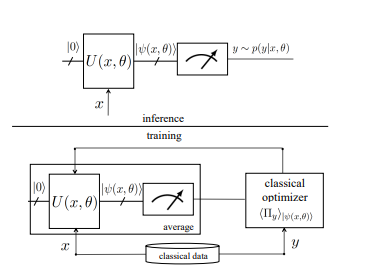

Los modelos cuánticos probabilísticos para clasificación se basan en PQC y operan de manera similar a las Born machines, usando el principio de la mecánica cuántica para modelar distribuciones de probabilidad.


# Inferencia

Dado un modelo con parámetros fijos $\boldsymbol\theta$, al recibir una entrada $x$, se aplica el circuito cuántico $U(x, \boldsymbol\theta)$, el cual deja al sistema en un estado cuántico embebido $\lvert\psi(x,\boldsymbol\theta)\rangle$. Para clasificar $x$, se mide este estado y se obtiene una cadena binaria $y$ de longitud $m$ (la etiqueta),esta medición es proyectiva, definida por una colección de operadores de proyección $\{\Pi_y\}$ que cubren todas las posibles salidas $y \in \{0,1\}^m$.El resultado de la medición es aleatorio, y su distribución está dada por la regla de Born:

$$
p(y \mid x, \boldsymbol\theta) = \langle \psi(x,\boldsymbol\theta) \lvert \Pi_y \rvert \psi(x,\boldsymbol\theta) \rangle,
$$

lo cual representa una probabilidad condicional de obtener la etiqueta $y$ dada la entrada $x$ y los parámetros del modelo. Esto convierte al modelo en un mapeo estocástico de entradas a etiquetas, donde una sola medición puede bastar para hacer inferencia.

## Entrenamiento

Para entrenar el modelo, se utiliza una función de pérdida lineal basada en la probabilidad del resultado correcto:

$$
\ell(x, y \mid \boldsymbol\theta) = 1 - p(y \mid x, \boldsymbol\theta) = 1 - \langle \Pi_y \rangle,
$$

donde $\langle \Pi_y \rangle$ es la expectativa del observable $\Pi_y$ sobre el estado $\lvert \psi(x,\boldsymbol\theta) \rangle$. Esta pérdida mide cuánto se aleja la predicción del modelo de asignar alta probabilidad a la etiqueta correcta,  la pérdida total sobre un conjunto de datos $D$ es:

$$
L_D(\boldsymbol\theta) = \frac{1}{|D|} \sum_{(x,y) \in D} \langle \psi(x,\boldsymbol\theta) \lvert (I - \Pi_y) \rvert \psi(x,\boldsymbol\theta) \rangle,
$$

El cual es  la expectativa del observable $I - \Pi_y$ promediada sobre todos los ejemplos. Entonces el problema de entrenamiento se convierte en una optimización estocástica con múltiples observables .

En la práctica, este entrenamiento se implementa mediante descenso estocástico doble .






#Modelos Deterministas

Un modelo determinista implementa una función parametrizada $h(x|\theta)$ del input $x$. La función $h(x|\theta)$ generalmente devuelve un vector con valores continuos. Los modelos deterministas pueden usarse tanto para regresión como para clasificación.

En el caso de la **regresión**, la variable objetivo $y$ es generalmente un vector con valores reales. Por lo tanto, en tiempo de inferencia, dado un input $x$, el modelo puede usar directamente la salida de la función $h(x|\theta)$ como la estimación de la variable objetivo $y$.

En el caso de la **clasificación**, la variable objetivo es un índice de clase con valores discretos. Para producir una estimación de $y$, la salida de la función $h(x|\theta)$ se pasa por una función de activación para producir una decisión directa  o una distribución de probabilidad sobre los posibles valores de salida.

Por ejemplo, para clasificación binaria, se puede usar el **signo** de la función escalar $h(x|\theta)$ para obtener una decisión dura.
O bien, podemos “aplastar” la salida $h(x|\theta)$ usando, por ejemplo, una función sigmoide $\sigma(\cdot)$ para producir una probabilidad:

  $$
  \Pr[y = 1|x, \theta] = \sigma(h(x|\theta)) = \frac{1}{1 + \exp(-h(x|\theta))}
  $$

como en la regresión logística.De manera similar, paraclasificación multiclase, el vector real que entrega $h(x|\theta)$ puede ser pasado por una **función softmax**, produciendo un vector de probabilidades sobre los índices de clase.

## Entrenamiento:

Para el entrenamiento, el enfoque estándar es resolver el problema de ERM  definido en la ecuación , con una función de pérdida como la de .

* Por ejemplo, para regresión con una variable escalar $y$, se puede usar la **pérdida cuadrática**:

  $$
  \ell(x, y|\theta) = (y - h(x|\theta))^2
  $$

* Para clasificación binaria usando la función de activación (6.69), se puede usar la pérdida de entropía cruzada:

  $$
  \ell(x, y|\theta) = -y \log \sigma(h(x|\theta)) - (1 - y) \log \sigma(-h(x|\theta)) \tag{6.71}
  $$

#Modelos deterministas cuanticos

Ahora para usar PQC para implementar modelos deterministas para el aprendizaje supervisado, cubriendo tanto la fase de inferencia como la de entrenamiento se puede serguir el siguiente esquema:


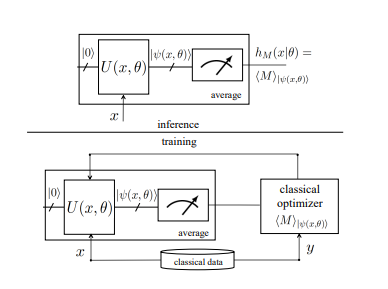






### Inferencia:

Un PQC puede usarse para implementar una función determinista $h_M(x|\theta)$ midiendo el valor esperado de un observable $M$ bajo el embedding cuántico $|\psi(x, \theta)\rangle$. Es decir, dado un input $x$, el PQC se ejecuta múltiples veces para estimar la expectativa:

$$
h_M(x|\theta) = \langle \psi(x, \theta) | M | \psi(x, \theta) \rangle = \langle M \rangle_{|\psi(x,\theta)\rangle}
$$

La función $h_M(x|\theta)$ puede usarse, como se describió anteriormente, para hacer predicciones tanto en regresión como en clasificación.

La función $h_M(x|\theta)$ en  se puede reescribir como:

$$
h_M(x|\theta) = \operatorname{tr}(M \rho(x, \theta))
$$

donde se define la matriz de densidad como $\rho(x, \theta) = |\psi(x, \theta)\rangle \langle \psi(x, \theta)|$.

Esto deja claro que la función $h_M(x|\theta)$ es lineal en el embedding cuántico $\rho(x, \theta)$. Por lo tanto, un modelo cuántico determinista implementa efectivamente una función discriminativa lineal en el espacio de embeddings cuánticos, cuyos **pesos están definidos por el observable** $M$.


#### **Entrenamiento:**

Habiendo definido la salida del modelo como en , las funciones de pérdida pueden introducirse directamente como en la subsección anterior.

Por ejemplo, si consideramos el problema de regresión escalar con la pérdida cuadrática , obtenemos:

$$
\ell(x, y|\theta) = (y - h_M(x|\theta))^2 = (y - \langle M \rangle_{|\psi(x, \theta)\rangle})^2
$$

Esta pérdida depende del valor esperado del observable $M$, así como de la variable objetivo $y$. Esto se ilustra en la parte inferior de la figura anterior.

Dada esta dependencia del valor esperado, el problema de minimización del riesgo empírico puede resolverse usando los métodos de optimización discutidos en la Sección.

Por ejemplo, para la pérdida cuadrática, el gradiente de la pérdida se puede escribir como:

$$
\nabla \ell(x, y|\theta) = -2(y - \langle M \rangle_{|\psi(x, \theta)\rangle}) \cdot \nabla \langle M \rangle_{|\psi(x, \theta)\rangle}
$$

donde el gradiente del observable $\langle M \rangle$ puede estimarse usando la regla de desplazamiento de parámetros


